In [77]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("../scripts")
%load_ext autoreload
%autoreload 2
from local_plot import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read poses from topic /SwarmNode1/pose
Trajectory total length  105.25473063328084
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Read poses from topic /SwarmNode2/pose
Trajectory total length  121.61648549126976
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Yaw Offset,  0.9408502079078342 Fused Offset [0.83332292 0.33438636 0.1256772 ]
RMSE Fused Online 1 is 0.126,0.133,0.101
RMSE Fused Offline Path 1 is 0.075,0.099,0.033
RMSE VO 1 is 0.643,0.426,0.146
RMSE Fused Online 2 is 0.166,0.126,0.037
RMSE Fused Offline Path 2 is 0.055,0.127,0.031
RMSE VO 2 is 0.682,0.220,0.113
RMSE 1->2 0.218,0.126,0.123


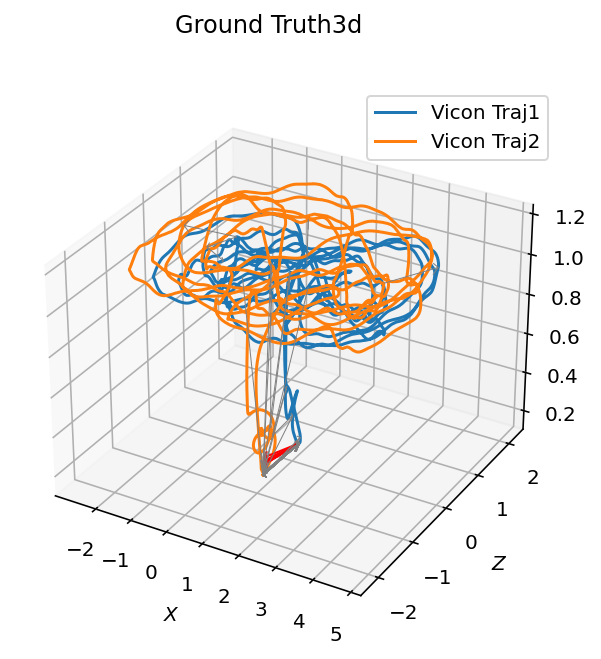

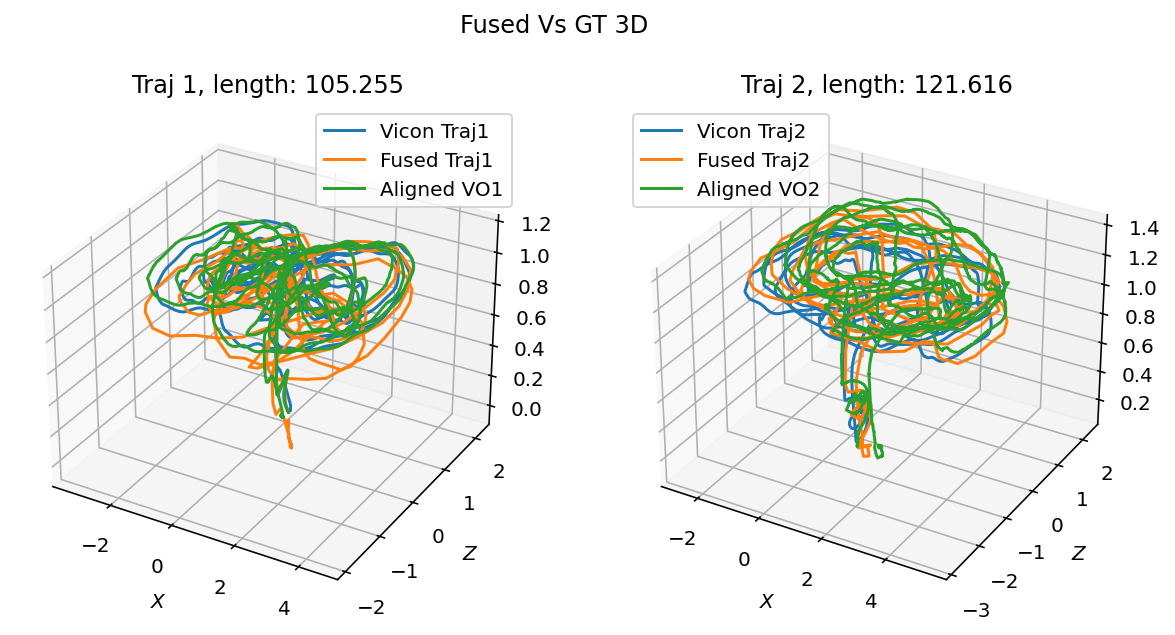

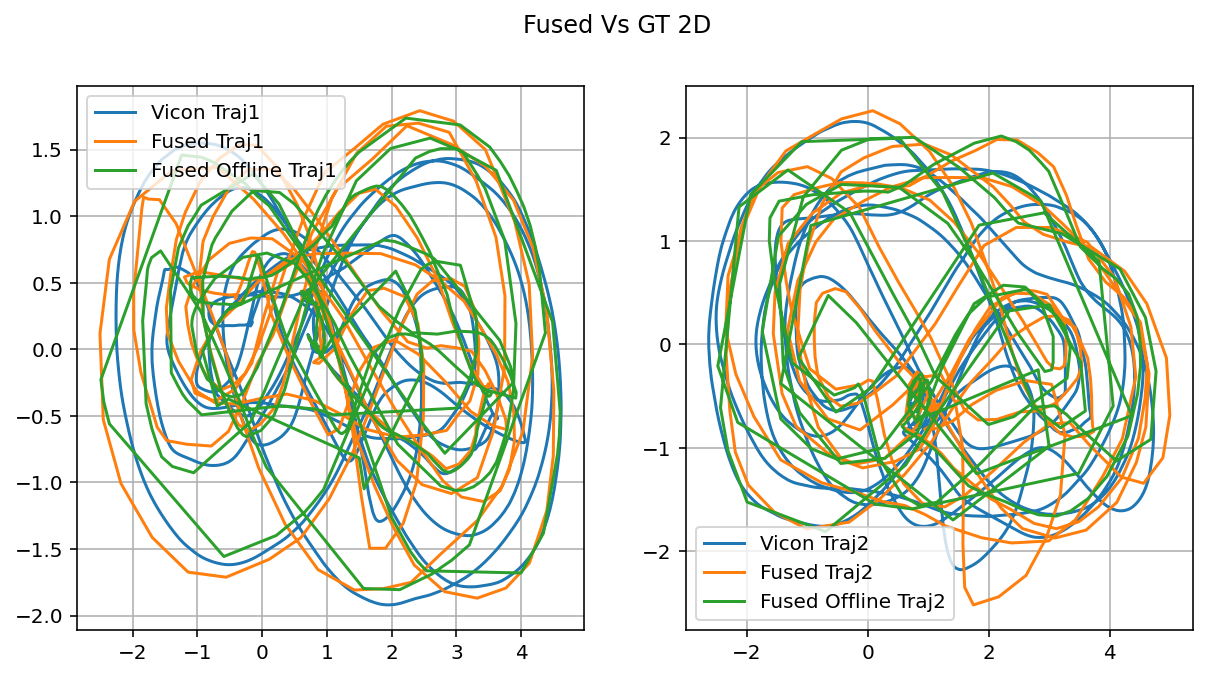

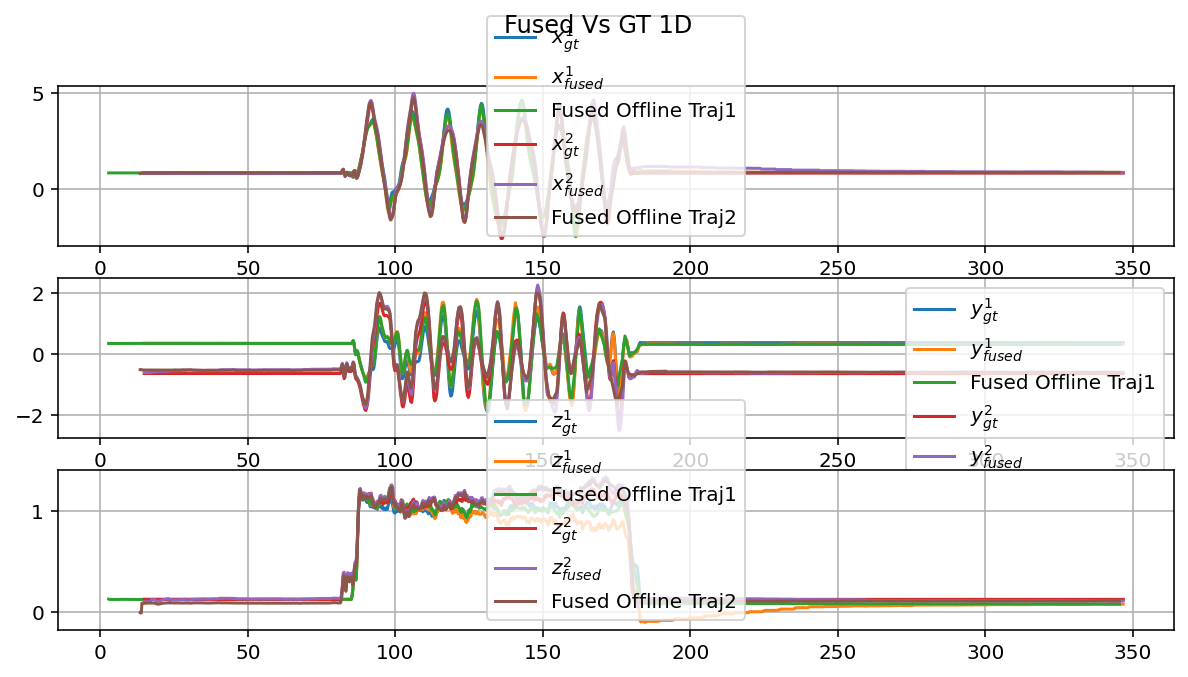

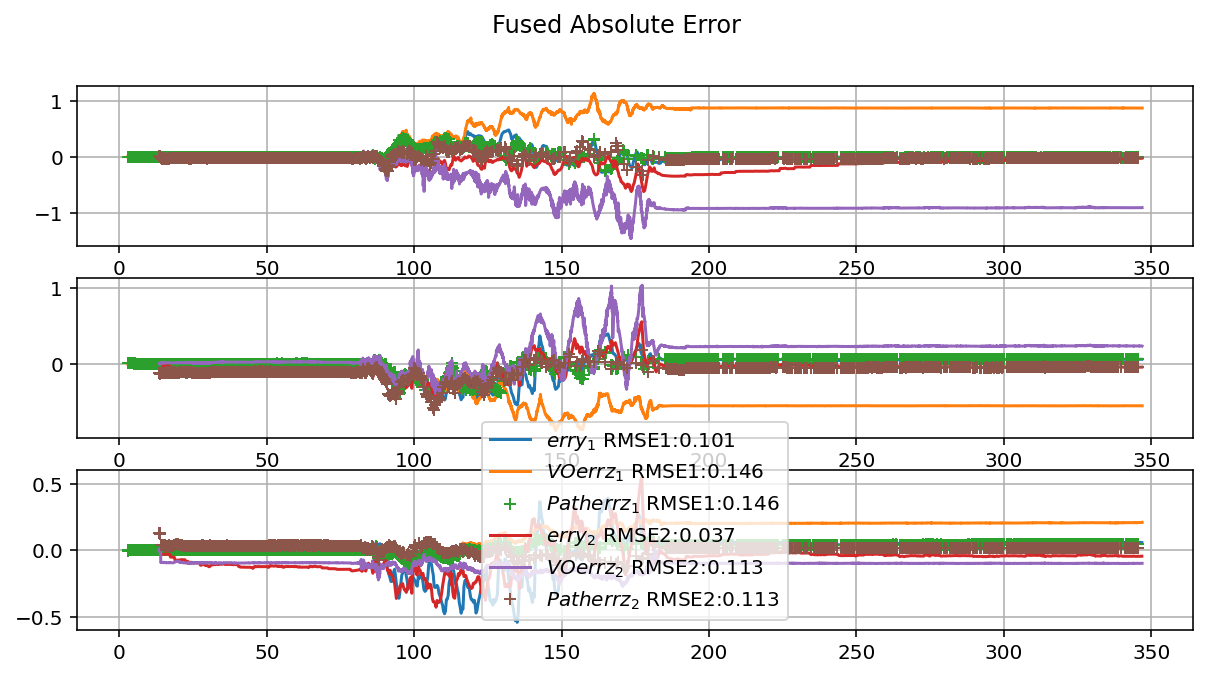

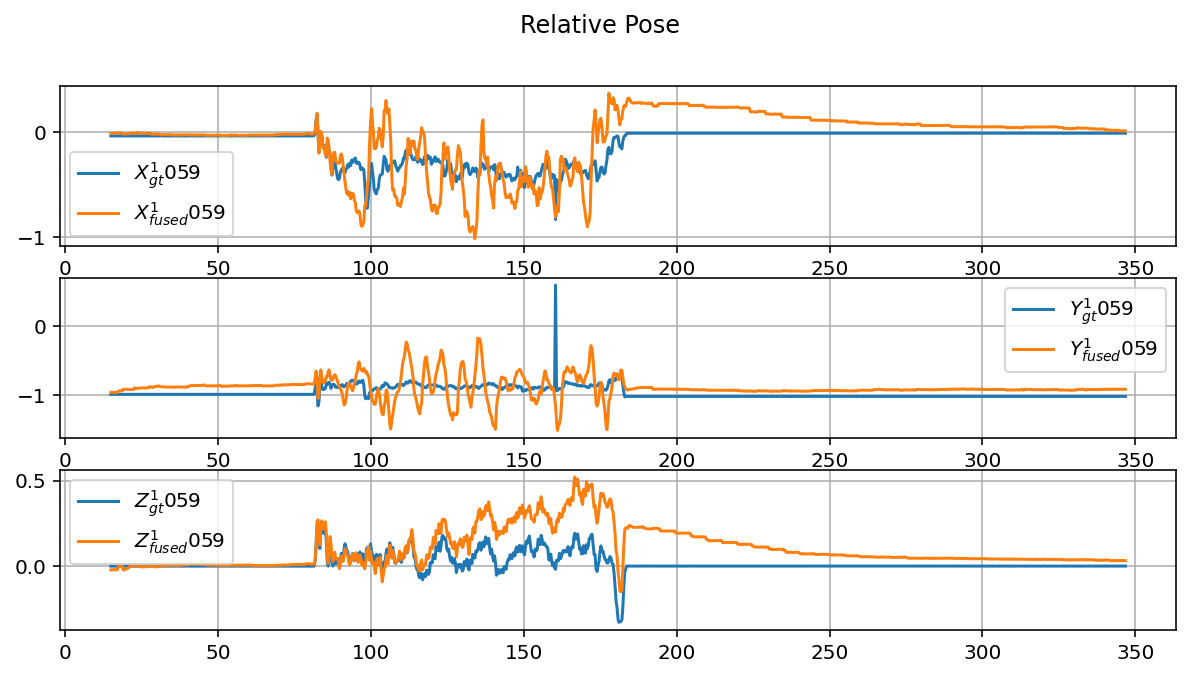

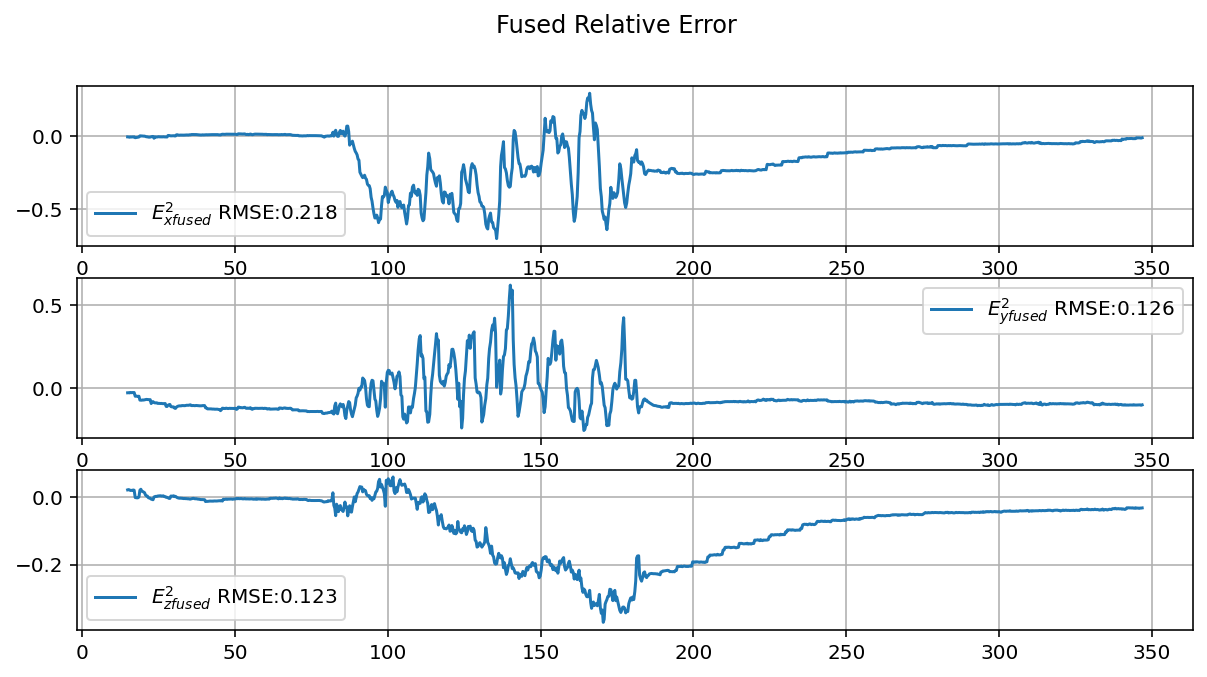

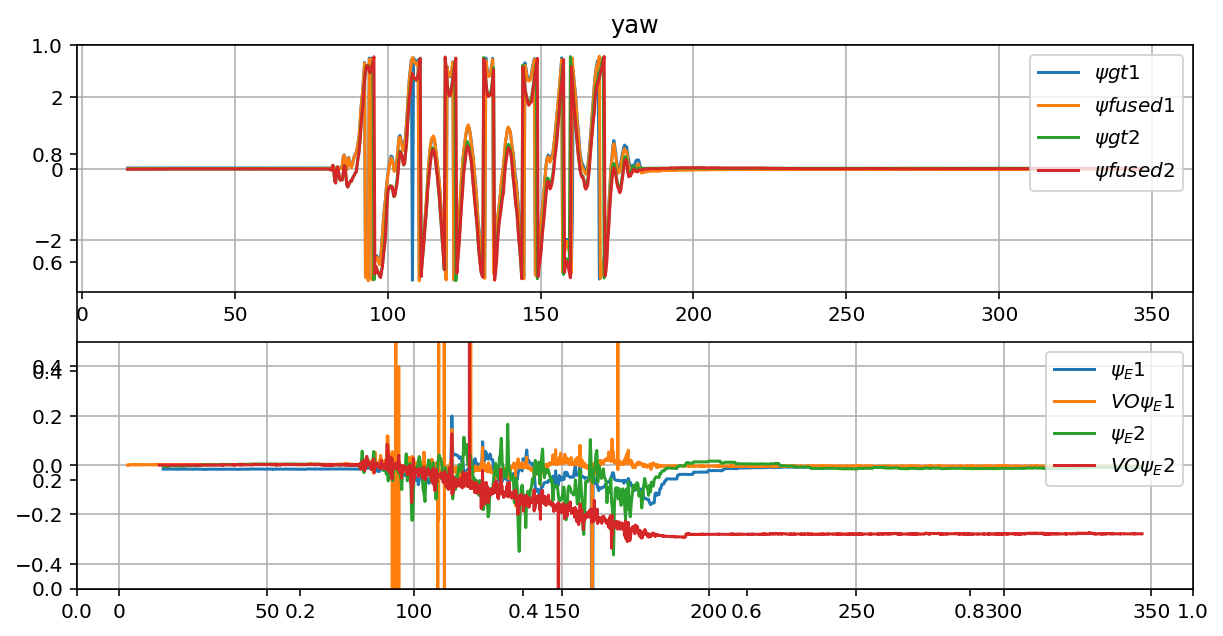

In [89]:
nodes = [1, 2]
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-19-39-05.bag", nodes, False)
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-20-33-29.bag", nodes, False)
poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_pc.bag", nodes, True)

plt.close('all')

plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes)
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes, 1)
plt.show()

Total loops 113
Error 2.844974514640768 {'ts_a': 81.60954666137695, 'ts_b': 81.01575255393982, 'id_a': 2, 'id_b': 1, 'dpos': array([-0.01504569,  3.62283577, -0.99914524]), 'dyaw': 0.03975565905823698}
Error 2.6434042176921864 {'ts_a': 112.05966973304749, 'ts_b': 171.41571307182312, 'id_a': 2, 'id_b': 1, 'dpos': array([-0.10988601,  3.06582336, -0.33950822]), 'dyaw': -0.2768945587198215}
Error 3.094871438150167 {'ts_a': 98.11579298973083, 'ts_b': 172.1100447177887, 'id_a': 1, 'id_b': 2, 'dpos': array([ 0.31717057,  2.21267214, -0.31980134]), 'dyaw': 0.03035598613571322}
Pos cov 0.005747073087552221 0.20571628567772088 0.013965377747204445
Yaw cov 0.002017965510456326


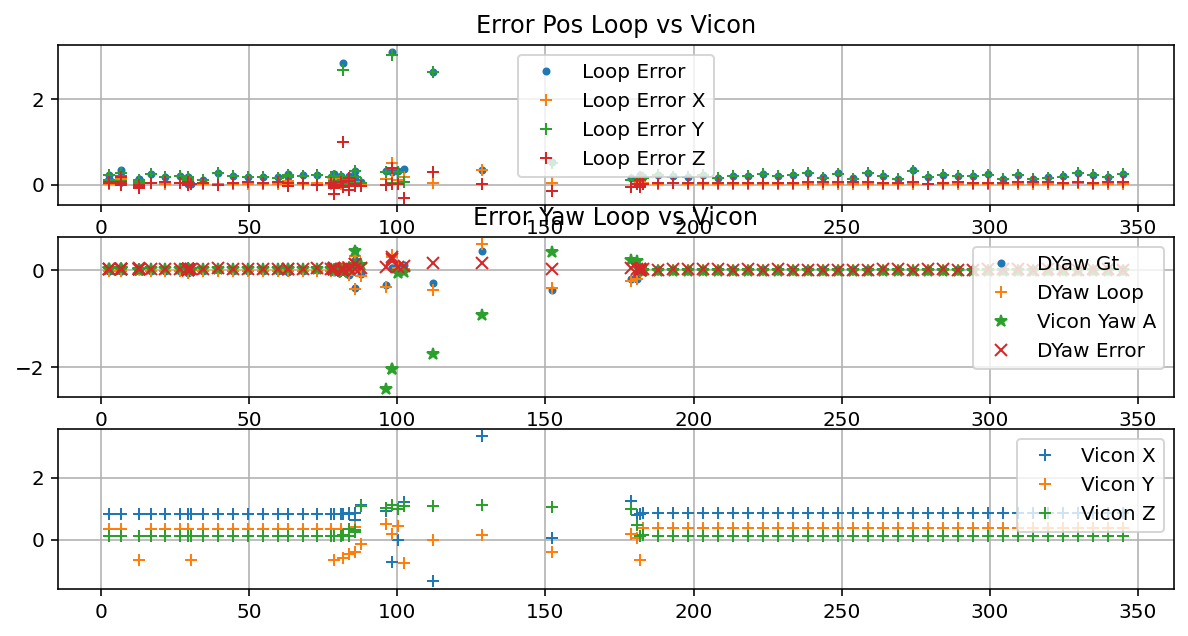

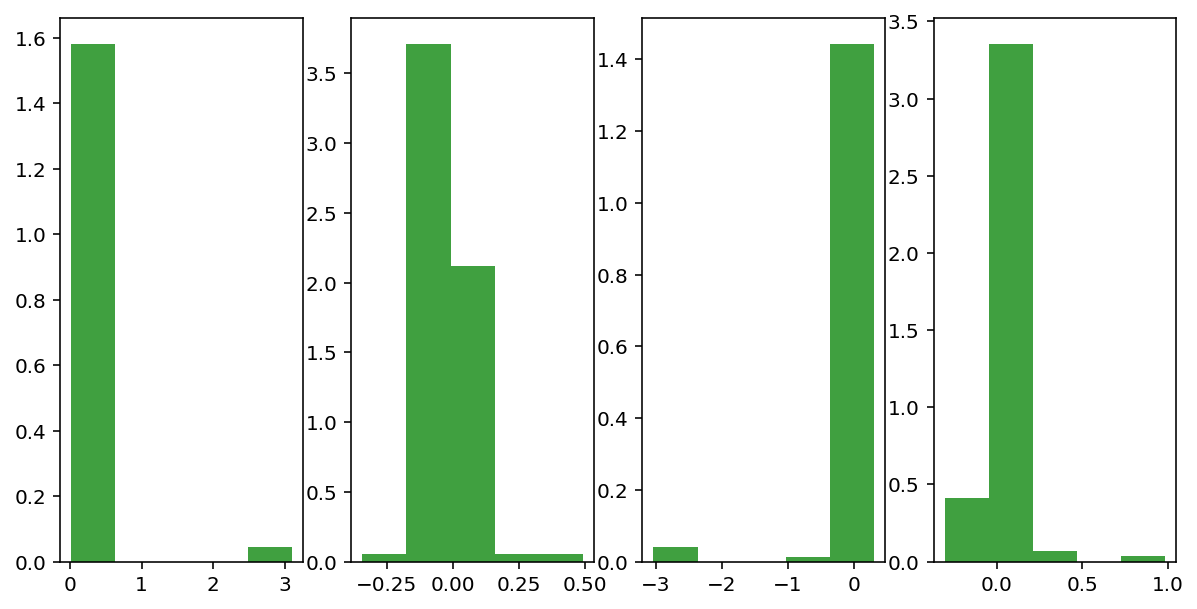

In [86]:
plot_loops_error(poses, loops, nodes)

In [ ]:
bag = rosbag.Bag("data/swarm_local_pc.bag")
pathes = read_path_all(bag, "/swarm_drones/est_drone_1_path", 0)
fig = plt.figure("Pathes")
#for k in range(508, 510):
for k in range(len(pathes)):
    path = pathes[k]
    #plt.plot(path["pos"][:,0],path["pos"][:,1], label=str(k))
    #plt.plot(path["pos"][0,0],path["pos"][0,1], '-o', label=str(k))
    plt.plot(path["pos"][:,0],path["pos"][:,1], '-o', label=str(k))
plt.legend()
plt.show()